# Problem Set 4: Overlapping Generations Models
## Thomas Pellet
### Week 4 - OSE Lab


In [ ]:
# Example

def get_L(n1, n2, n3):
    '''
    -----------------
    Labor Market clearing
    '''
    L = n1 + n2 + n3
    return L

def get_K(b2, b3):
    K = b2 + b3
    return K

def get_r(b2, b3, params):
    α, A, δ = params
    r = 
    return r
    
    
def get_w(b2, b3)

#### Exercise 2.1

In [184]:
import numpy as np
from scipy.optimize import root


β, A, α, δ, σ = .96**20,1,.35,.6415, 3
nvec = np.array([1,1,0.2])
f_params = (nvec, A, α, δ, β)


# Return on labor
w = lambda b2, b3: (1-α)*A*((b2 + b3)/np.sum(nvec))**α

# Return on capital
r = lambda b2, b3: (α)*A*(np.sum(nvec)/(b2 + b3))**(1-α) - δ

# Uprime
uprime = lambda c: c**(-σ)

def SS(X):
    b2, b3 = X

    return [uprime(w(b2,b3)*nvec[0] - b2) - β*(1 + r(b2,b3))*uprime(w(b2,b3)*nvec[1] + \
            (1 + r(b2,b3))*b2 - b3), \
           uprime(w(b2,b3)*nvec[1] + (1 + r(b2,b3))*b2 - b3) - β*(1 + r(b2,b3))* \
           uprime((1 + r(b2,b3))*b3 + nvec[2]*w(b2,b3))]
    
def solveSS(bvec_guess):
    
    solve = root(SS,bvec_guess)
    b2_ss, b3_ss = solve.x
    
    k = b2_ss + b3_ss
    c1 = nvec[0]*w(b2_ss,b3_ss) - b2_ss
    c2 = nvec[1]*w(b2_ss,b3_ss) + (1+r(b2_ss,b3_ss))*b2_ss -b3_ss
    c3 = nvec[2]*w(b2_ss,b3_ss) + (1+r(b2_ss,b3_ss))*b3_ss
    
    return b2_ss, b3_ss, c1, c2, c3, k
    

def feasible(f_params, bvec_guess):
    
    #Initiate vector of outputs
    b_cnstr = np.empty([2,], dtype='bool_')
    c_cnstr = np.empty([3,], dtype='bool_')
    K_cnstr = np.empty([1,], dtype='bool_')
    K_cnstr[0] = False
    c = np.empty([3,], dtype='float')
    

    b2_ss, b3_ss, c1, c2, c3, k = solveSS(bvec_guess)
    print("B2 ",b2_ss, "B3 ", b3_ss)
    c = np.array([c1,c2,c3])
    print(c)
    if k <= 0:
        K_cnstr[0] = True
    
    for i, item in enumerate(c):
        if item <= 0:
            c_cnstr[i] = True           
        else:
            c_cnstr[i] = False
    
    b_cnstr[:] = False
    if   c_cnstr[0] == True:
        b_cnstr[0] = True
        
    elif c_cnstr[1] == True:
        b_cnstr[0] = True
        b_cnstr[1] = True
        
    elif c_cnstr[2] == True:
        b_cnstr[1] = True
    print(" \t \t Period 1 ", "Period 2 ", "Period 3 \n","C constrained \t", c_cnstr[0], "\t", c_cnstr[1], "\t", c_cnstr[2], "\n", "B constrained \t", b_cnstr[0], "\t", b_cnstr[1])
    
    return b_cnstr, c_cnstr, K_cnstr




    

In [185]:
bvec_guess = np.array([1.0, 1.2])
result = feasible(f_params, bvec_guess)

B2  1.9468539249297103e+46 B3  4.191494645495242e+45
[-1.94685392e+46  2.78797668e+45  1.50265083e+45]
 	 	 Period 1  Period 2  Period 3 
 C constrained 	 True 	 False 	 False 
 B constrained 	 True 	 False


In [186]:
bvec_guess = np.array([0.06, -0.001])
result = feasible(f_params, bvec_guess)

B2  0.06 B3  -0.001
[0.12317391 0.42635236 0.03259848]
 	 	 Period 1  Period 2  Period 3 
 C constrained 	 False 	 False 	 False 
 B constrained 	 False 	 False


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


In [187]:
bvec_guess = np.array([0.1, 0.1])
result = feasible(f_params, bvec_guess)

B2  0.01931271933217477 B3  0.05841151349308521
[0.18241249 0.20961516 0.2408745 ]
 	 	 Period 1  Period 2  Period 3 
 C constrained 	 False 	 False 	 False 
 B constrained 	 False 	 False


### Exercise 2.2

In [188]:
import time
from matplotlib import pyplot as plt



def get_SS(params, bvec_guess, SS_graphs):
    β, A, α, δ, σ, nvec, L, SS_tol = params
    start_time = time.clock()
    EulErr_ss = np.empty([2,], dtype='float')
    
    b2_ss, b3_ss, c1, c2, c3, K_ss = solveSS(bvec_guess)
    b_ss = np.array([b2_ss,b3_ss])
    c_ss = np.array([c1,c2,c3])
    C_ss = c1 + c2 + c3
    Y_ss = A*K_ss**α*L**(1-α)
    w_ss = w(b2_ss,b3_ss)
    r_ss = r(b2_ss,b3_ss)
    EulErr_ss = SS([b2_ss,b3_ss]) 
    RCerr_ss = Y_ss - C_ss - δ*K_ss
      
    ss_time = time.clock() - start_time # Place at end of get_SS()
  
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 'Y_ss': Y_ss, 'C_ss': C_ss,
    'EulErr_ss': EulErr_ss, 'RCerr_ss': RCerr_ss,
    'ss_time': ss_time}
    
    if SS_graphs == True:
        plt.plot([20,40,60], ss_output['c_ss'], '-r')
        plt.title('Consumption distribution')
        plt.show()
        plt.plot([40,60],ss_output['b_ss'],'-g')
        plt.title('Savings distribution')
        plt.show()
        
    
    return ss_output
    
    
    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


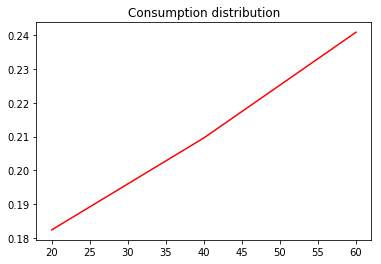

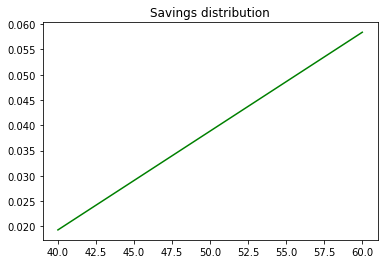

In [7]:
L = np.sum(nvec)
SS_tol = 1e10-5
params = β, A, α, δ, σ, nvec, L, SS_tol
bvec_guess = np.array([0.1, 0.1])
SS_graphs = True
ss_output = get_SS(params, bvec_guess, SS_graphs)

In [8]:
print(ss_output)

{'b_ss': array([0.01931272, 0.05841151]), 'c_ss': array([0.18241249, 0.20961516, 0.2408745 ]), 'w_ss': 0.20172520884942252, 'r_ss': 2.4330467299114265, 'K_ss': 0.07772423282525998, 'Y_ss': 0.682762245336507, 'C_ss': 0.6329021499791027, 'EulErr_ss': [-1.3926637620897964e-12, 2.6432189770275727e-12], 'RCerr_ss': 4.85722573273506e-17, 'ss_time': 0.0023334000000012622}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


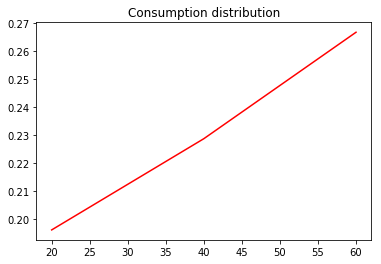

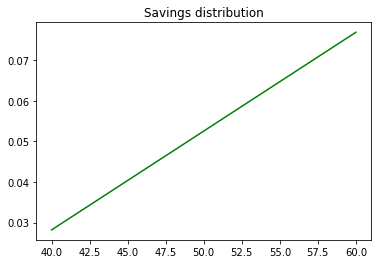

In [9]:
L = np.sum(nvec)
SS_tol = 1e10-5
β = 0.55
params = β, A, α, δ, σ, nvec, L, SS_tol
bvec_guess = np.array([0.1, 0.1])
SS_graphs = True
ss_output = get_SS(params, bvec_guess, SS_graphs)

If $\beta$ increases, agents save more because they are more patient and consume more because the return on capital is higher. The saving rate however is higher.

#### Exercise 2.3

In [222]:
import numpy as np
from scipy.optimize import root
nvec = np.array([1.0, 1.0, 0.2])
L = np.sum(nvec)
tol = 1e-7
T = 50
ξ = 0.2
bvec_guess = np.array([0.1, 0.1])
β, A, α, δ, σ = .96**20,1,.35,.6415, 3

def uprime(c):
    if c > 0: 
        return c**(-σ)
    else:
        return 5000


def euleryoung(X, *params):
    #print("params", params)
    b2, b3 = X
    w1,w2,w3,r1,r2,r3 = params
    # Problem for the young
    error1 = uprime(w1 - b2) - β*(1+r2)*uprime(w2 + (1+r2)*b2 - b3)
    error2 = uprime(w2 + (1+r2)*b2 - b3) - β*(1+r3)*uprime((1+r3)*b3+0.2*w3)

    error = [error1, error2]

    return error
    

def eulerma(X,*params):
    b3 = X
    w1,w2,r1,r2,b2 = params
    # Problem for the middle aged
    error = uprime(w1 + (1+r1)*b2 - b3) - β*(1+r2)*uprime((1+r2)*b3+0.2*w2)
    return error

# Return on labor
w_f = lambda b2, b3: (1-α)*A*((b2 + b3)/L)**α

# Return on capital
r_f = lambda b2, b3: α*A*(L/(b2 + b3))**(1-α) - δ


def TPI(tol,T,w_f,r_f,euleryoung,eulerma,L,nvec):
    
    params = β, A, α, δ, σ, nvec, L, SS_tol
    ss_output = get_SS(params, bvec_guess, False)
    print("Steady state savings: ", ss_output['b_ss'])
    bvec_init = np.array([ss_output['b_ss'][0]*0.8, \
                           ss_output['b_ss'][0]*1.1])
    
    K_init = np.sum(bvec_init)
    print("Initial Capital: ", K_init)

    #Linear guess for path of aggregate capital
    K = np.zeros(T+6)
    K[0:T] = np.linspace(K_init,ss_output['K_ss'],T)
    K[T:T+7] = ss_output['K_ss']
    
    plt.plot(range(T+6),K)
    plt.title("Initial path for capital")
    plt.show
    
    b = np.empty([T+6,2])
    W = np.empty([T+6,1])
    R = np.empty([T+6,1])
    C = np.empty([T+6,2])
    Y = np.empty([T+6,2])
    ProdErr = np.empty([T+6,2])
    EulerErr = np.empty([T+6,2])
    # Iterate over the K path
    while True:
        # Update prices
        W = w_f(K/2,K/2)
        R = r_f(K/2,K/2)
        
        #Solve the Middle Age problem
        params = W[0],W[1],R[0],R[1],b[0,0]
        b[1,1] = root(eulerma,b[0,1],args=(params)).x
        print("Initial savings",  b[1,1])
        # Time Path Iteration
        for i,item in enumerate(K[:T+4]):
            #print("period ", i)
            paramyoung = W[i],W[i+1],W[i+2],R[i],R[i+1],R[i+2]
            guess = [b[i,0],b[i+1,1]]
            solve = root(euleryoung,guess,args=(paramyoung)).x
            b[i+1,0], b[i+2,1] = solve
            #print("Updated savings rule", b[i+1,0], b[i+2,1])
#             C[i,0] =  W[i] + (1+R[i])*b[i,0] - b[i+1,1]
#             C[i,1] =  0.2*W[i] + (1+R[i])*b[i,1]
#             Y[i] = A*K[i]**α*L**(1-α)
#             ProdErr[i] = Y[i] - np.sum(C[i,:]) - b[i+1,0] - b[i+1,1] + (1-δ)*(b[i,0] - b[i,1])

        
        Knew = np.sum(b,axis=1)
        #print("Updated Capital Path: ", Knew)
        #print(abs(Knew - K))
        ϵ = np.sum(abs(Knew - K),axis=0)
        print(ϵ)
        if ϵ < tol:
            print("Converged")
            print(ϵ)
            break
        
        # Update the path of capital
        else: K = ξ*Knew + (1-ξ)*K
    
    TPI_output = {
    'b': b, 'W': W, 'R': R,
    'K': K}
#     'EulErr': EulErr, 'ProdErr': ProdErr}
    return TPI_output

        

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Steady state savings:  [0.01931272 0.05841151]
Initial Capital:  0.036694166731132065
Initial savings 6.93040574495e-312
3.326805385861361
Initial savings 6.93040574495e-312
2.661444308689089
Initial savings 6.93040574495e-312
2.1291554469512715
Initial savings 6.93040574495e-312
1.7033243575610169
Initial savings 6.93040574495e-312
1.3626594860488137
Initial savings 6.93040574495e-312
1.090127588839051
Initial savings 6.93040574495e-312
0.8721020710712408
Initial savings 6.93040574495e-312
0.6976816568569927
Initial savings 6.93040574495e-312
0.5581453254855941
Initial savings 6.93040574495e-312
0.44651626038847536
Initial savings 6.93040574495e-312
0.3572130083107803
Initial savings 6.93040574495e-312
0.28577040664862424
Initial savings 6.93040574495e-312
0.22861632531889942
Initial savings 6.93040574495e-312
0.18289306025511956
Initial savings 6.93040574495e-312
0.14631444820409564
Initial savings 6.93040574495e-312
0.11705155856327652
Initial savings 6.93040574495e-312
0.0936412468

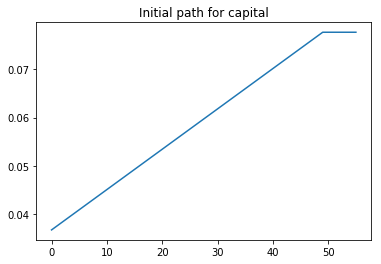

In [223]:
result = TPI(tol,T,w,r,euleryoung,eulerma, L, nvec)  


<function matplotlib.pyplot.show(*args, **kw)>

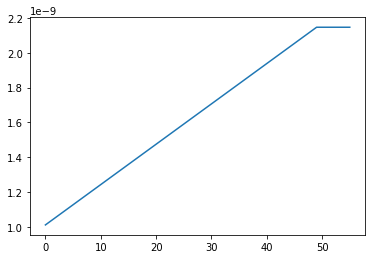

In [224]:
from matplotlib import pyplot as plt
plt.plot(range(T+6), result['K'])
plt.show



[410196.26131091 404224.18579457 398467.9913936  392915.41332386
 387555.12640642 382376.65524705 377370.29463857 372527.03884349
 367838.51861356 363296.94496873 358895.05889776 354626.08625955
 350483.6972639  346461.96999385 342555.35750356 338758.65808599
 335066.98835724 331475.75884849 327980.65183509 324577.60116531
 321262.77387983 318032.55343766 314883.52438591 311812.45832913
 308816.30107067 305892.16081236 303037.29731154 300249.11190529
 297525.13832134 294863.03420373 292260.57328859 289715.63817215
 287226.21361892 284790.38036323 282406.3093617  280072.25645875
 277786.55743047 275547.62337573 273353.93642625 271204.04574995
 269096.56382427 267030.16295819 265003.57204382 263015.57351963
 261065.00052966 259150.7342636  257271.70146465 255426.87209264
 253615.25713126 251835.90652903 251835.90652903 251835.90652903
 251835.90652903 251835.90652903 251835.90652903 251835.90652903]


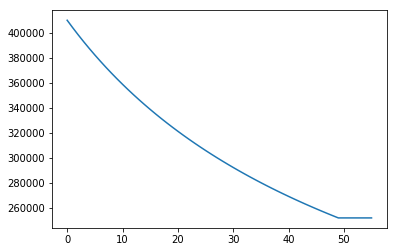

In [220]:
plt.plot(range(T+6), result['R'])
plt.show
print(result['R'])

<function matplotlib.pyplot.show(*args, **kw)>

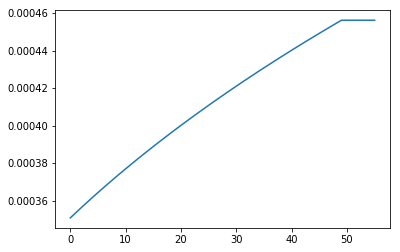

In [225]:
plt.plot(range(T+6), result['W'])
plt.show

#### Exercise 3.2

In [290]:
import time
from matplotlib import pyplot as plt

import numpy as np
from scipy.optimize import root

S = 80
β = 0.96**(80/S)
α = 0.35
A = 1
σ = 3
δ = 1 - (1-0.05)*(80/S)
nvec = np.ones(S)
bvec = np.ones(S)
f_params = (nvec, A, α, δ, β)

b_all = np.sum(bvec)
l_all = np.sum(nvec)

# Return on labor
def w(bvec, nvec):
    b = np.sum(bvec[1:S+1])
    n = np.sum(nvec)
    
    w = (1-α)*A*(b/n)**α
    return(w)

# Return on capital
def r(bvec, nvec):
    b = np.sum(bvec[1:S+1])
    n = np.sum(nvec)
    
    r = α*A*(n/b)**(1-α)-δ
    return(r)


# Uprime
def uprime(c):
    if c > 0: 
        return c**(-σ)
    else:
        return 5000

def SS(bvec, *param):
    S, nvec = param
    
    wc = w(bvec, nvec)
    #print("Wage is ", wc)
    rc = r(bvec, nvec)
    #print("R is ", rc)
    Sol = []
    
    for i in range(S-3):
        Soli = uprime(wc*nvec[i] + (1+rc)*bvec[i] - bvec[i+1]) - β*(1+rc)* \
                    uprime(wc*nvec[i+1] + (1+rc)*bvec[i+1] - bvec[i+2])
        Sol.append(Soli)
        
    i = S-3
    #print(nvec[i])
    #print(bvec[i])
    #print(bvec[i+1])
    Soli = uprime(wc*nvec[i] + (1+rc)*bvec[i] - bvec[i+1]) - β*(1+rc)* \
                    uprime(wc*nvec[i+1] + (1+rc)*bvec[i+1])
    Sol.append(Soli)
    i = S - 2 
    #print(nvec[i])
    #print(bvec[i])
    Soli = uprime(wc*nvec[i] + (1+rc)*bvec[i])
    Sol.append(Soli)

    #print(Sol)
    
    return(Sol)



def solveSS(S, bvec, nvec):
    
    print("running solve")
    p = S, nvec
    solve = root(SS, bvec, args=p)
    b_ss = solve.x
    #print("b_ss is", b_ss)
    
    K_ss = np.sum(b_ss)
    
    c_ss = np.empty_like(b_ss)
    wc = w(b_ss, nvec)
    rc = r(b_ss, nvec)
    
    L = np.sum(nvec)
    
    for i in range(S-1):
        c_ss[i] = nvec[i]*wc + (1+rc)*b_ss[i-1] - b_ss[i]
    c_ss[0] = nvec[0]*wc - b_ss[0]
    return b_ss, c_ss, wc, rc, K_ss, L
    


def get_SS(params, bvec_guess, SS_graphs):
    β, A, α, δ, σ, nvec, S = params
    start_time = time.clock()
    
    EulErr_ss = np.empty([S,], dtype='float')
    
    #print("Run solveSS")
    b_ss, c_ss, w_ss, r_ss, K_ss, L = solveSS(S, bvec_guess, nvec)
    Y_ss = A*K_ss**α*L**(1-α)
    C_ss = np.sum(c_ss)
    
    EulErr_ss = SS(b_ss, S, nvec) 
    RCerr_ss = Y_ss - C_ss - δ*K_ss
      
    ss_time = time.clock() - start_time # Place at end of get_SS()
    print('It took %1.3s seconds to solve the OLG model' % ss_time)
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 'Y_ss': Y_ss,
    'EulErr_ss': EulErr_ss, 
    'RCerr_ss': RCerr_ss,
    'ss_time': ss_time}
    

    return ss_output

In [291]:
bvec = \
    np.array([-0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

print(bvec.shape)

(79,)


In [292]:
S= 80
nvec = np.ones(S)
index = round(2*S/3)+1
nvec[index:] = 0.2
params = β, A, α, δ, σ, nvec, S
result = get_SS(params, bvec, False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


running solve
It took 0.8 seconds to solve the OLG model


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:114: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


<function matplotlib.pyplot.show(*args, **kw)>

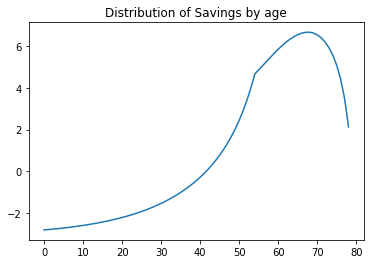

In [293]:
plt.plot(result['b_ss'])
plt.title('Distribution of Savings by age')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

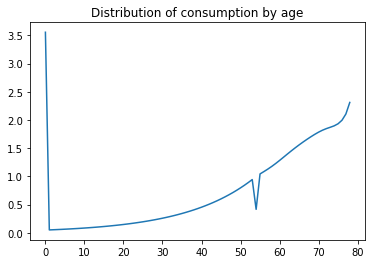

In [295]:
plt.plot(result['c_ss'])
plt.title('Distribution of consumption by age')
plt.show

In [303]:
import time
from matplotlib import pyplot as plt

import numpy as np
from scipy.optimize import root

S = 80
β = 0.96**(80/S)
α = 0.35
A = 1
σ = 3
δ = 1 - (1-0.05)*(80/S)
nvec = np.ones(S)
bvec = np.ones(S)
f_params = (nvec, A, α, δ, β)

b_all = np.sum(bvec)
l_all = np.sum(nvec)

# Return on labor
def w(bvec, nvec):
    b = np.sum(bvec[1:S+1])
    n = np.sum(nvec)
    
    w = (1-α)*A*(b/n)**α
    return(w)

# Return on capital
def r(bvec, nvec):
    b = np.sum(bvec[1:S+1])
    n = np.sum(nvec)
    
    r = α*A*(n/b)**(1-α)-δ
    return(r)


# Uprime
def uprime(c):
    if c > 0: 
        return c**(-σ)
    else:
        return 5000

def SS(bvec, *param):
    S, nvec = param
    
    wc = w(bvec, nvec)
    #print("Wage is ", wc)
    rc = r(bvec, nvec)
    #print("R is ", rc)
    Sol = []
    i = 0
    Soli = uprime(wc*nvec[i] - bvec[i+1]) - β*(1+rc)* \
            uprime(wc*nvec[i+1] - bvec[i+2])
    Sol.append(Soli)
    for i in range(1,S-3):
        Soli = uprime(wc*nvec[i] + (1+rc)*bvec[i] - bvec[i+1]) - β*(1+rc)* \
                    uprime(wc*nvec[i+1] + (1+rc)*bvec[i+1] - bvec[i+2])
        Sol.append(Soli)
        
    i = S-3
    #print(nvec[i])
    #print(bvec[i])
    #print(bvec[i+1])
    Soli = uprime(wc*nvec[i] + (1+rc)*bvec[i] - bvec[i+1]) - β*(1+rc)* \
                    uprime(wc*nvec[i+1] + (1+rc)*bvec[i+1])
    Sol.append(Soli)
    i = S - 2 
    #print(nvec[i])
    #print(bvec[i])
    Soli = uprime(wc*nvec[i] + (1+rc)*bvec[i])
    Sol.append(Soli)

    #print(Sol)
    
    return(Sol)



def solveSS(S, bvec, nvec):
    
    print("running solve")
    p = S, nvec
    solve = root(SS, bvec, args=p)
    b_ss = solve.x
    #print("b_ss is", b_ss)
    
    K_ss = np.sum(b_ss)
    
    c_ss = np.empty_like(b_ss)
    wc = w(b_ss, nvec)
    rc = r(b_ss, nvec)
    
    L = np.sum(nvec)
    
    for i in range(S-1):
        c_ss[i] = nvec[i]*wc + (1+rc)*b_ss[i-1] - b_ss[i]
    c_ss[0] = nvec[0]*wc - b_ss[0]
    return b_ss, c_ss, wc, rc, K_ss, L
    


def get_SS(params, bvec_guess, SS_graphs):
    β, A, α, δ, σ, nvec, S = params
    start_time = time.clock()
    
    EulErr_ss = np.empty([S,], dtype='float')
    
    #print("Run solveSS")
    b_ss, c_ss, w_ss, r_ss, K_ss, L = solveSS(S, bvec_guess, nvec)
    Y_ss = A*K_ss**α*L**(1-α)
    C_ss = np.sum(c_ss)
    
    EulErr_ss = SS(b_ss, S, nvec) 
    RCerr_ss = Y_ss - C_ss - δ*K_ss
      
    ss_time = time.clock() - start_time # Place at end of get_SS()
    print('It took %1.3s seconds to solve the OLG model' % ss_time)
    ss_output = {
    'b_ss': b_ss, 'c_ss': c_ss, 'w_ss': w_ss, 'r_ss': r_ss,
    'K_ss': K_ss, 'Y_ss': Y_ss,
    'EulErr_ss': EulErr_ss, 
    'RCerr_ss': RCerr_ss,
    'ss_time': ss_time}
    

    return ss_output

In [304]:
bvec = \
    np.array([-0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    -0.01, 0.1, 0.2, 0.23, 0.25, 0.23, 0.2, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
    0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

print(bvec.shape)




S= 80
nvec = np.ones(S)
index = round(2*S/3)+1
nvec[index:] = 0.2
params = β, A, α, δ, σ, nvec, S
result = get_SS(params, bvec, False)

(79,)
running solve


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:105: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


It took 0.2 seconds to solve the OLG model


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:117: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


<function matplotlib.pyplot.show(*args, **kw)>

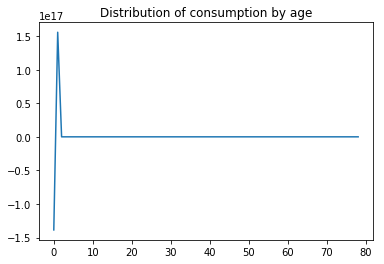

In [307]:
plt.plot(result['c_ss'])
plt.title('Distribution of consumption by age')
plt.show